In [1]:
import numpy as np
import matplotlib.pyplot as plt

import data_transform as dt
from models import *

import plotters as plot

In [2]:
data = dt.get_data()
train_X, test_X, train_y, test_y = dt.get_train_test_data(data)

print((sum(train_y)+sum(test_y))/(len(train_y)+len(test_y)))
print(sum(train_y)/len(train_y), sum(test_y)/len(test_y))

0.34992679355783307
0.35384615384615387 0.34210526315789475


In [3]:
logistic = LogisticRegression()
logistic.fit(train_X, train_y)

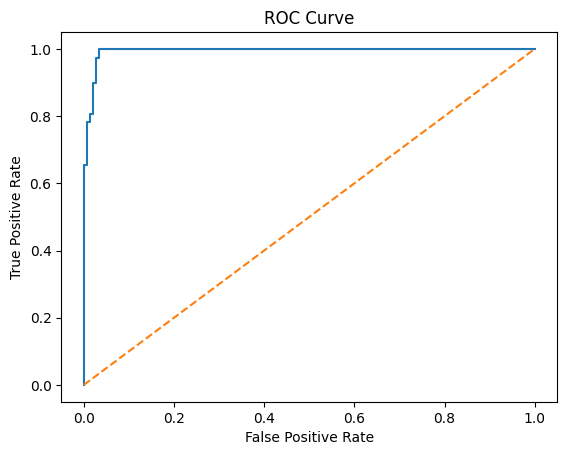

In [4]:
plot.plot_roc_curve(test_y, logistic.predict_prob(test_X))

In [5]:
# area
from sklearn.metrics import roc_auc_score

roc_auc_score(test_y, logistic.predict_prob(test_X))

0.9941025641025641

In [6]:
from sklearn.metrics import f1_score

f1_score(test_y, logistic.predict(test_X))

0.9620253164556962

In [7]:
bayes = NaiveBayes(9, 10)

bayes.fit(train_X, train_y)

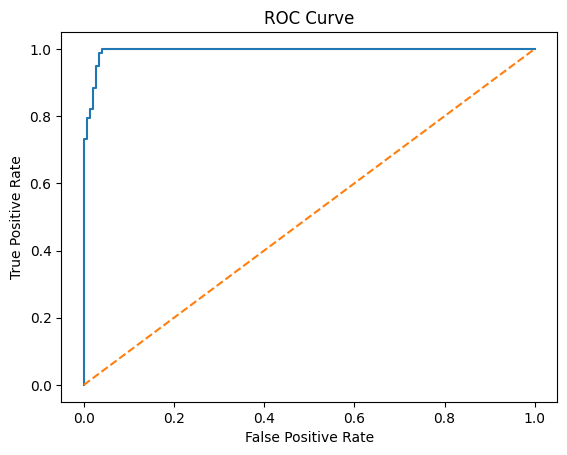

In [8]:
plot.plot_roc_curve(test_y, bayes.predict_prob(test_X))

In [9]:
roc_auc_score(test_y, bayes.predict_prob(test_X))

0.9944444444444446

In [10]:
f1_score(test_y, bayes.predict(test_X))

0.9625

In [21]:
def plot_learing_curve(model, data):
    train_scores = []
    test_scores = []
    
    n_repeat = 10
    
    checked_fracs = list(np.arange(0.01, 0.06, 0.01))
    checked_fracs += list(np.arange(0.1, 0.3, 0.05))
    checked_fracs += list(np.arange(0.3, 1, 0.1))
    checked_fracs += [1]
    
    for frac in checked_fracs:
        curr_train_scores = []
        curr_test_scores = []
        while(len(curr_train_scores) < n_repeat):
            train_X, test_X, train_y, test_y = dt.get_train_test_data(data)
            stop_id = int(frac*len(train_X))
            train_X_frac, train_y_frac = train_X[:stop_id], train_y[:stop_id]
            if sum(train_y_frac) == 0 or sum(train_y_frac) == len(train_y_frac):
                print("no luck")
                print(frac, sum(train_y_frac), len(train_y_frac))
                continue
            
            model.fit(train_X_frac, train_y_frac)
            
            curr_train_scores.append(f1_score(train_y_frac, model.predict(train_X_frac)))
            curr_test_scores.append(f1_score(test_y, model.predict(test_X)))
        train_scores.append(np.mean(curr_train_scores))
        test_scores.append(np.mean(curr_test_scores))
        print(f'frac: {frac}, train: {train_scores[-1]}, test: {test_scores[-1]}')
        
    plt.plot(checked_fracs, train_scores, label='train')
    plt.plot(checked_fracs, test_scores, label='test')
    plt.legend()
    plt.show()
    

no luck
0.01 0 4
frac: 0.01, train: 1.0, test: 0.6573096822723887
frac: 0.02, train: 1.0, test: 0.7983316249938941
frac: 0.03, train: 1.0, test: 0.8216291896896436
frac: 0.04, train: 1.0, test: 0.8369680266648049
frac: 0.05, train: 1.0, test: 0.8791344479001578
frac: 0.1, train: 0.9941176470588236, test: 0.891656096417458
frac: 0.15000000000000002, train: 0.9956521739130434, test: 0.908199220806698
frac: 0.20000000000000004, train: 0.9916588684500504, test: 0.9125219082276314
frac: 0.25000000000000006, train: 0.9964705882352941, test: 0.928065788839407
frac: 0.3, train: 0.981398422852305, test: 0.9381301424767153
frac: 0.4, train: 0.9730147412416426, test: 0.9296539509970667
frac: 0.5, train: 0.9759976131931495, test: 0.9361357385116484
frac: 0.6000000000000001, train: 0.9620864699824707, test: 0.947140103767768
frac: 0.7000000000000002, train: 0.9656128549809491, test: 0.9495052825124111
frac: 0.8000000000000003, train: 0.959990194939228, test: 0.9591031527481098
frac: 0.9000000000000

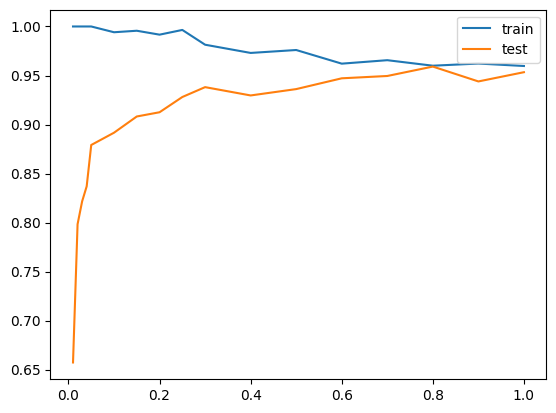

In [22]:
plot_learing_curve(LogisticRegression(), data)

no luck
0.01 0 4
no luck
0.01 0 4
frac: 0.01, train: 1.0, test: 0.7855887558195077
frac: 0.02, train: 1.0, test: 0.8860043127494093
frac: 0.03, train: 1.0, test: 0.8915668587175647
frac: 0.04, train: 0.981162181471779, test: 0.9166081651625293
frac: 0.05, train: 0.9933333333333334, test: 0.9213760315733557
frac: 0.1, train: 0.9733886774778995, test: 0.9381406371022838
frac: 0.15000000000000002, train: 0.9820062214856369, test: 0.9503048959680773
frac: 0.20000000000000004, train: 0.9650406006011186, test: 0.9556158871338376
frac: 0.25000000000000006, train: 0.9778183390148968, test: 0.9546470410482295
frac: 0.3, train: 0.9652443256430638, test: 0.9649880129201291
frac: 0.4, train: 0.9726748245991732, test: 0.9653274515424576
frac: 0.5, train: 0.9683010677709085, test: 0.9619502008422719
frac: 0.6000000000000001, train: 0.9726259389547778, test: 0.9583539675475613
frac: 0.7000000000000002, train: 0.97164865885312, test: 0.9599013591286703
frac: 0.8000000000000003, train: 0.97102392079034

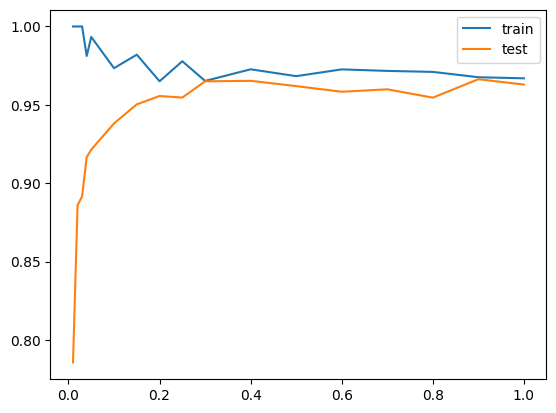

In [24]:
plot_learing_curve(NaiveBayes(9, 10), data)